# Exercise 2.2: Classification

In this exercise, you will develop and train a machine-learning classifier using 2D polynomial basis functions, following the example laid out on the lecture.

First we load the data from `classification_data.csv`. It contains the columns `x`, `y` and `class`. Your classifier should aim to predict `class` for a given $(x,y)$ tuple.

Text(0.5, 1.0, 'Labelled data')

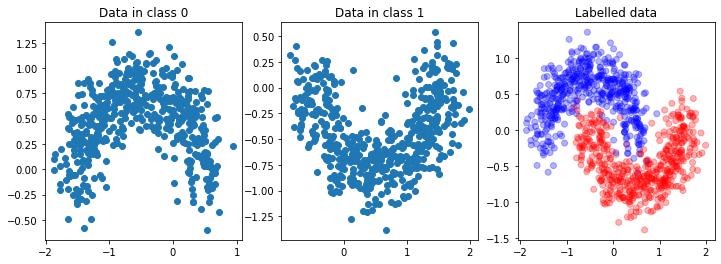

In [2]:
import pandas as pd
df = pd.read_csv("classification_data.csv")

from matplotlib import pyplot as plt
fig,axes = plt.subplots(1,3, figsize=(12,4))
for t in 0,1:
    class_data = df.loc[df["class"] == t]
    axes[t].scatter(class_data["x"], class_data["y"])
    axes[t].set_title(f"Data in class {t}")
axes[2].scatter(df["x"], df["y"], c=df["class"], cmap="bwr", alpha=0.3)
axes[2].set_title("Labelled data")

Your classifier will need a few features to be useful:

### Evaluation of the polynomial function

As in the lecture notes, you should implement a 2D polynomial function that resembles
$$
\phi(x,y|\mathbf{c}) = (c_{00} + c_{10} x + c_{01} y + c_{11} xy + c_{20} x^2 ...)
$$

or more generally

$$
\phi(x,y|\mathbf{c}) = \sum_{i=0}^n \sum_{j=0}^n c_{ij} x^i y^j
$$

where $\mathbf{c}$ is a matrix of coefficients.

Be aware that the CPU time scales very badly with the max degree $n$. A value of 3 or 4 should be sufficient.

### Evaluation of the objective function

Here you can just use a simple quadratic difference, as used in the least squares technique.

$$
f(\vec{(x,y,t)}|\mathbf{c}) = \sum_i \left(t_i - \phi(x_i,y_i|\mathbf{c})\right)^2
$$

where $\mathbf{c}$ is a matrix of coefficients.

Be aware that the CPU time scales very badly with the max degree $n$. A value of 3 or 4 should be sufficient.

### Evaluation of the objective function

Here you can just use a simple quadratic difference, as used in the least squares technique.

$$
f(\vec{(x,y,t)}|\mathbf{c}) = \sum_i \left(t_i - \phi(x_i,y_i|\mathbf{c})\right)^2
$$

where $\sum_i$ denotes the sum over the rows in the dataset $\vec{(x,y,t)}$, and $x$, $y$ and $t$ correspond to the columns `x`, `y` and `class`, respectively.

### Training

Training in this context is just performing a least squares fit to the data in order to obtain the best estimates of the coefficients $\mathbf{c}$.

You can use [`scipy.optimize.minimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html). Remember that the first argument `fun` is the objective function $f$, not the polynomial function $\phi$. The second argument `x0` is a list of initial guesses of the coefficients.

The `minimize` function will return an `OptimizeResult` object, whose member `x` contains the optimised coefficients.

*e.g.* you can use it like this:
```python
class poly2D:
    #... partial example implementation
    def f(self, c, x, y t):
        """
            c is a list of coefficients
            x, y and t are lists of the same length
        """
        # return the sum of squares of t - \phi(x,y|c)
    def train(self, x, y, t):
        """
            x, y and t are lists of the same length
        """
        result = minimize(fun = self.f, x0 = self.coefficients, args = (x, y, t))
        self.coefficients = result.x
```

### Prediction

Finally, your classifier should be able to predict $t$ given a new value of $x$ and $y$.
This is just a matter of evaluating a "score" $ = \phi(x,y|\mathbf{c})$ and choosing a value of $t$ based on a "cut" on that score.

The dataset is constructed such that 0.5 is already the optimal cut:
$$
t(x,y) =
\begin{cases}
    0, & \phi(x,y|\mathbf{c}) \leq 0.5 \\
    1, & \phi(x,y|\mathbf{c}) > 0.5 \\
\end{cases}
$$

1) Split the data randomly into training and testing samples.

In [3]:
x_total = df["x"].to_numpy()
y_total = df["y"].to_numpy()
t_total = df["class"].to_numpy()


t_index = int(x_total.size*0.2)
training_sample = [x_total[:t_index], y_total[:t_index], t_total[:t_index]]
testing_sample = [x_total[t_index:], y_total[t_index:], t_total[t_index:]]

2) Implement the classifier here and find the optimal coefficients $\mathbf{c}$ by fitting the training sample.

In [4]:
import numpy as np

class poly2d:
    import numpy as np
    
    def __init__(self, param_dim):
        if type(param_dim) == tuple:
            self.ni, self.nj = param_dim
        else:
            self.ni = param_dim
            self.nj = self.ni

        self.c = np.zeros((self.ni, self.nj))
        print(f"We have a {self.c.shape} parameter matrix.")
                
        return None
    
    def phi_internal(self, x, y, c):
        out = 0
        c = c.reshape(self.ni, self.nj)
        for i in range(self.ni):
            for j in range(self.nj):
                out += c[i, j] * x**i * y **j
        return out

    def f(self, c, x, y, t):
        """
        x, y coords.
        t class, [0, 1) i guess
        c matrix
        """
        return np.sum( (t - self.phi_internal(x, y, c))**2 )


    def train(self, data, feedback=False):
        from scipy.optimize import minimize
        try:
            self.x, self.y, self.t = data
        except:
            raise(DataError) 
        if feedback:
            print("... training ...")
        result = minimize(fun=self.f, x0=self.c.flatten(), args=(self.x, self.y, self.t))
        self.coefficients = result.x
        if feedback:
            print("\t    done!")
        return self.coefficients.reshape(self.ni, self.nj)
        
p2d3 = poly2d(3)
p2d4 = poly2d(4)
p2d5 = poly2d(5)

We have a (3, 3) parameter matrix.
We have a (4, 4) parameter matrix.
We have a (5, 5) parameter matrix.


3) Now evaluate the classifier score $\phi(x,y|\mathbf{c})$ on the testing sample. Plot histograms of the distributions of the score for each class (*i.e.* each true value of $t$).

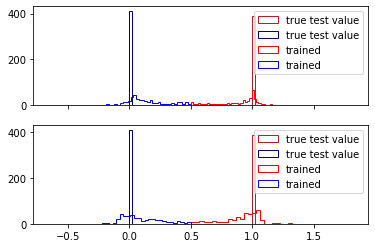

In [5]:
def phi(x, y, c):
        out = 0
        ni, nj = c.shape
        for i in range(ni):
            for j in range(nj):
                out += c[i, j] * x**i * y **j
        return out
    
x, y, t = testing_sample

copt3 = p2d3.train(training_sample)
copt4 = p2d4.train(training_sample)
copt5 = p2d5.train(training_sample)

copts = [copt3, copt4]

fig, axes = plt.subplots(2,1, sharex=True)

for i in range(2):

    prediction = phi(x, y, copts[i])
    
    _, _, t_test = testing_sample

    mask_test = t_test == 1
    mask_pred = prediction > 0.5

    axes[i].hist(t_test[mask_test], histtype="step", label="true test value", color='firebrick', bins=40)
    axes[i].hist(t_test[~mask_test], histtype="step", label="true test value", color='navy', bins=40)

    axes[i].hist(prediction[mask_pred], histtype="step", label="trained", color='r', bins=40)
    axes[i].hist(prediction[~mask_pred], histtype="step", label="trained", color='b', bins=40)

    axes[i].legend()

4) Create a contour plot in the $x$–$y$ plane visualising the decision boundary $\phi(x,y|\mathbf{c}) = 0.5$

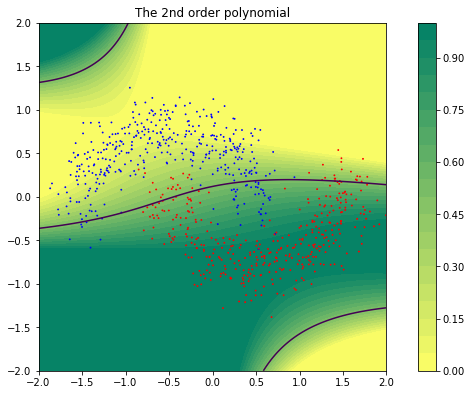

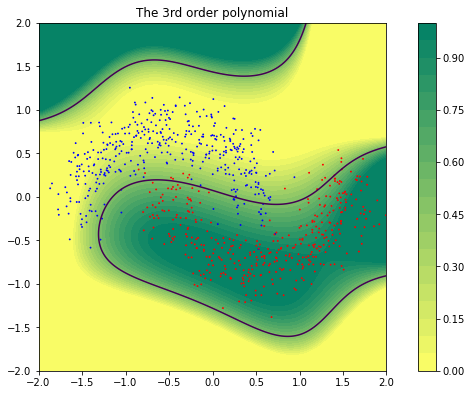

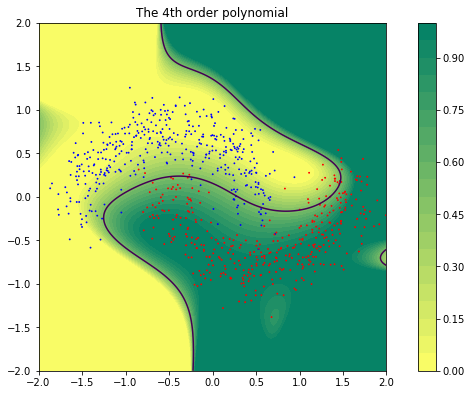

In [12]:
for opt in copt3, copt4, copt5:
    x, y = np.linspace(-2, 2, 1000), np.linspace(-2 ,2, 1000)

    xv, yv = np.meshgrid(x, y)

    x, y, t = testing_sample

    zs = phi(xv, yv, opt)
    zs[zs>1] = 1
    zs[zs<0] = 0

    plt.figure(figsize=(8.2,6.4))

    plt.contourf(xv, yv, zs, levels=np.linspace(0, 1, 21), cmap=plt.cm.summer_r, vmin=0., vmax=1.)
    plt.colorbar()
    plt.contour(xv, yv, zs, levels=[0.5])
    plt.scatter(x, y, c=t, cmap=plt.cm.bwr, alpha=1, s=.7)
    plt.axis('scaled')
    if np.isclose(opt[-1, -1], copt4[-1, -1]):
        plt.title(f"The 3rd order polynomial")
    elif np.isclose(opt[-1, -1], copt5[-1, -1]):
        plt.title(f"The 4th order polynomial")
    else:
        plt.title("The 2nd order polynomial")
    plt.show()

5) Plot the receiver operating characteristic (ROC) curve evaluated on the testing sample and calculate the area under the curve

Optimal c w/ training sample size = 200 
is 0.01


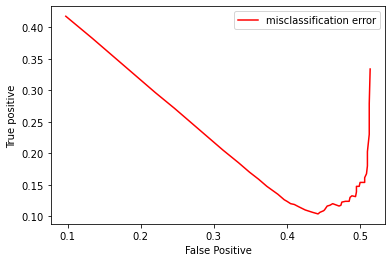

In [14]:
x, y, t = testing_sample

predict = phi(x, y, copt3)

true_positive, false_positive = [], []
tp_min = 1e-8

for c in np.linspace(0.01, 1):
    predict_t = predict < c
    
    tp = (predict_t == t).sum()
    true_positive.append( tp )
    # ( (pos where neg) and (neg where pos) ) * (predict==pos)
    fp = np.sum((predict_t != t) * predict_t)
    false_positive.append( fp )
    
    # find best c
    if tp > tp_min:
        tp_min = tp
        best_c = c
    

trupos = np.array(true_positive) / t.size
falpos = np.array(false_positive)/ t.size

plt.plot(falpos, trupos, label="misclassification error", c='r')

plt.legend()
plt.xlabel("False Positive")
plt.ylabel("True positive")

print(f"Optimal c w/ training sample size = 200 \nis {best_c}")

In [ ]:
x, y, t = testing_sample

predict = phi(x, y, copt3)

efficiency, purity = [], []

for c in np.linspace(0, .5):
    predict_t = predict < c
    
    efficiency.append(np.sum((predict_t==(t[predict_t]>0))) / predict_t.size)
    purity.append(1 - np.sum((predict_t!=(t[predict_t]>0))) / predict_t.size)
    

eps = np.array(efficiency)
pi = np.array(purity)

plt.plot(eps, pi, label="ROC", c='b')

plt.legend()
plt.xlabel("False Positive")
plt.ylabel("True positive")

print(f"Optimal c w/ training sample size = 200 \nis {best_c}")

In [ ]:
predict_t==(t[predict_t]>0)

# Code complete

In [ ]:
import numpy as np

class poly2d:
    from scipy.optimize import minimize
    import numpy as np
    
    def __init__(self, param_dim):
        if type(param_dim) == tuple:
            self.ni, self.nj = param_dim
        else:
            self.ni = param_dim
            self.nj = self.ni

        self.c = np.zeros((self.ni, self.nj))
        print(f"We have a {self.c.shape} parameter matrix.")
                
        return None
    
    def phi_internal(self, x, y, c):
        out = 0
        c = c.reshape(self.ni, self.nj)
        for i in range(self.ni):
            for j in range(self.nj):
                out += c[i, j] * x**i * y **j
        return out

    def f(self, c, x, y, t):
        """
        x, y coords.
        t class, [0, 1) i guess
        c matrix
        """
        return np.sum( (t - self.phi_internal(x, y, c))**2 )


    def train(self, data, feedback=False):
        try:
            self.x, self.y, self.t = data
        except:
            raise(DataError) 
        if feedback:
            print("... training ...")
        result = minimize(fun=self.f, x0=self.c.flatten(), args=(self.x, self.y, self.t))
        self.coefficients = result.x
        if feedback:
            print("\t    done!")
        return self.coefficients.reshape(self.ni, self.nj)
    
def phi(x, y, c):
        out = 0
        ni, nj = c.shape
        for i in range(ni):
            for j in range(nj):
                out += c[i, j] * x**i * y **j
        return out
    
# read data
x = df["x"].to_numpy()
y = df["y"].to_numpy()
t = df["class"].to_numpy()

# init trainer with 3x3 matrix
p2d = poly2d(4)

fig, axes_mat = plt.subplots(5, 2, constrained_layout=True, figsize=(8, 10))
axes = axes_mat.flatten()

for i in range(1, 10):
    t_index = int(x.size*i/10) - 50
    training_sample = [x[:t_index], y[:t_index], t[:t_index]]
    testing_sample = [x[t_index:], y[t_index:], t[t_index:]]

    copt = p2d.train(training_sample)


    x, y, t = testing_sample
    
    prediction = phi(x, y, copt)

    mask_test = t == 1
    mask_pred = prediction > 0.5

    axes[i-1].hist(prediction[mask_pred], histtype="step", label="trained", color='r', bins=50)
    axes[i-1].hist(prediction[~mask_pred], histtype="step", label="trained", color='b', bins=50)

    axes[i-1].hist(t[mask_test], histtype="step", label="classes", color='firebrick', bins=50)
    axes[i-1].hist(t[~mask_test], histtype="step", label="classes", color='navy', bins=50)

    axes[i-1].legend()
    
    axes[i-1].set_title(f"test_sample size: {i*100-50}")